# House Prices : Advanced Regression Techniques
- Predict sales prices

## Data Dictonary

### variable

In [577]:
text = open('data_description.txt', mode = 'r').read()
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data Exploration

In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [579]:
train = pd.read_csv('train.csv')
train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [580]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [581]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [582]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [583]:
ds = train.isnull().sum() 
ds[ds>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [584]:
ds.index

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

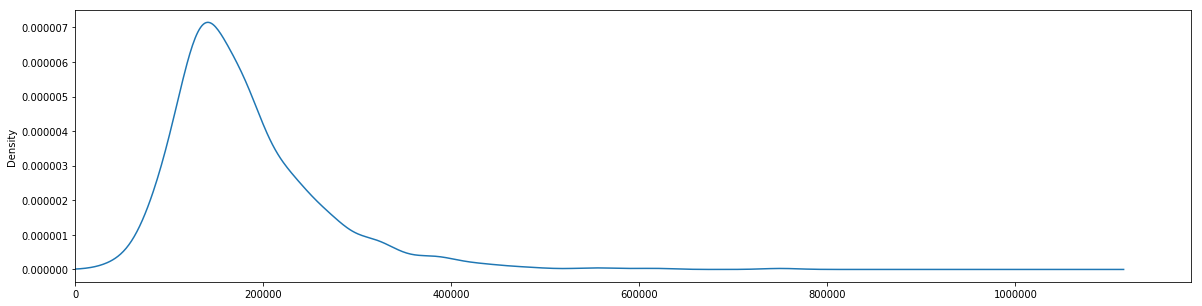

In [585]:
train['SalePrice'].plot(figsize = (20, 5), kind = 'kde', xlim = 0)

In [586]:
def chart_bar(feature):
    ax = train[[feature, 'SalePrice']].groupby(feature).mean().plot(kind = 'bar', figsize = (20,5), title = feature)
    ax.title.set_size(20)
    ax.set_xlabel(feature, fontsize = 20)
    ax.set_ylabel('Price', fontsize = 20)

for i in range(len(train.columns) - 2):
    chart_bar(train.columns[i + 1])

## Feature Engineering

In [587]:
train_test_data = [train, test]

In [588]:
train_test_data[1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


### 1. MSSubClass
Identifies the type of dwelling involved in the sale.

    20	1-STORY 1946 & NEWER ALL STYLES
    30	1-STORY 1945 & OLDER
    40	1-STORY W/FINISHED ATTIC ALL AGES
    45	1-1/2 STORY - UNFINISHED ALL AGES
    50	1-1/2 STORY FINISHED ALL AGES
    60	2-STORY 1946 & NEWER
    70	2-STORY 1945 & OLDER
    75	2-1/2 STORY ALL AGES
    80	SPLIT OR MULTI-LEVEL
    85	SPLIT FOYER
    90	DUPLEX - ALL STYLES AND AGES
    120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150	1-1/2 STORY PUD - ALL AGES
    160	2-STORY PUD - 1946 & NEWER
    190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [589]:
def train_test_info(feature):
    print('Information of {}'.format(feature), '\n')
    for data, a in zip(train_test_data, ['Train', 'Test']):
        print(a)
        print('Number of null : ', data[feature].isnull().sum())
        print('Number of value unique : ', len(data[feature].unique()))
        print('Kind of value unique : ', data[feature].unique())
        print('\n')

In [590]:
test['MSZoning'].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [591]:
train_test_info('MSSubClass')

Information of MSSubClass 

Train
Number of null :  0
Number of value unique :  15
Kind of value unique :  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


Test
Number of null :  0
Number of value unique :  16
Kind of value unique :  [ 20  60 120 160  80  30  50  90  85 190  45  70  75 180  40 150]




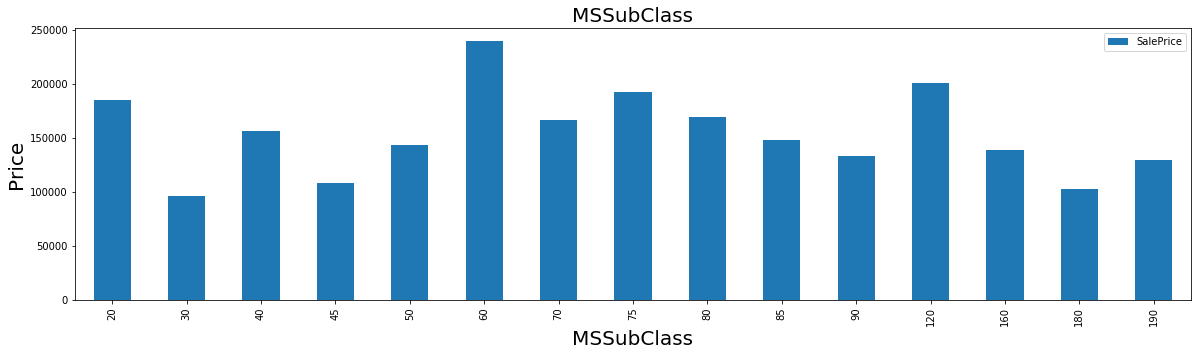

In [592]:
chart_bar('MSSubClass')

In [593]:
def mapping(feature):
    uni1 = np.sort(train[feature].unique())
    uni2 = np.sort(test[feature].unique())
    feature_mapping = {}
    for index, i in zip(uni1, range(len(uni1))):
        feature_mapping.update({index : i})
    for index, i in zip(uni2, range(len(uni2))):
        feature_mapping.update({index : i})
    return feature_mapping

In [594]:
mapping('MSSubClass')

{20: 0,
 30: 1,
 40: 2,
 45: 3,
 50: 4,
 60: 5,
 70: 6,
 75: 7,
 80: 8,
 85: 9,
 90: 10,
 120: 11,
 150: 12,
 160: 13,
 180: 14,
 190: 15}

In [595]:
for data in train_test_data:
    data['MSSubClass'] = data['MSSubClass'].map(mapping('MSSubClass'))

### 2. MSZoning
Identifies the general zoning classification of the sale.
		
    A	 Agriculture
    C	 Commercial
    FV    Floating Village Residential
    I	 Industrial
    RH	Residential High Density
    RL	Residential Low Density
    RP	Residential Low Density Park 
    RM	Residential Medium Density

In [596]:
train_test_info('MSZoning')

Information of MSZoning 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['RL' 'RM' 'C (all)' 'FV' 'RH']


Test
Number of null :  4
Number of value unique :  6
Kind of value unique :  ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]




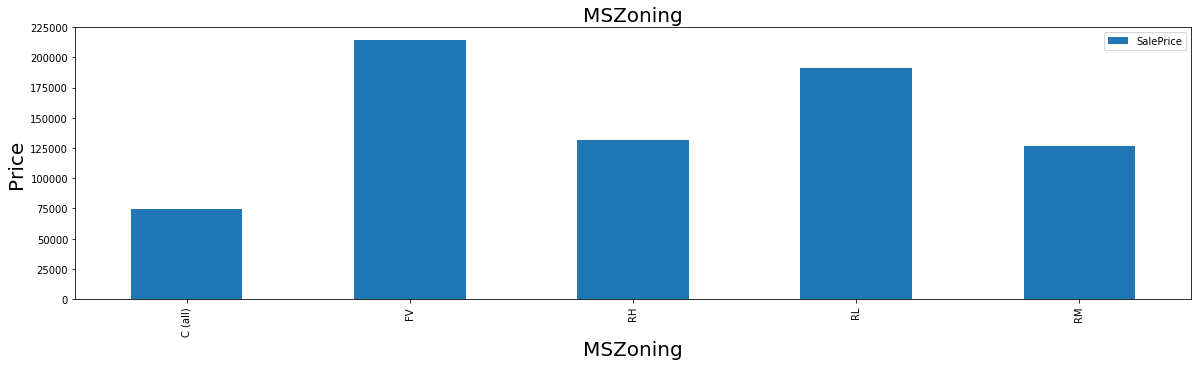

In [597]:
chart_bar('MSZoning')

### 2-1. Fill Null data

In [598]:
test[test['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,1,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,0,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,6,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,0,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


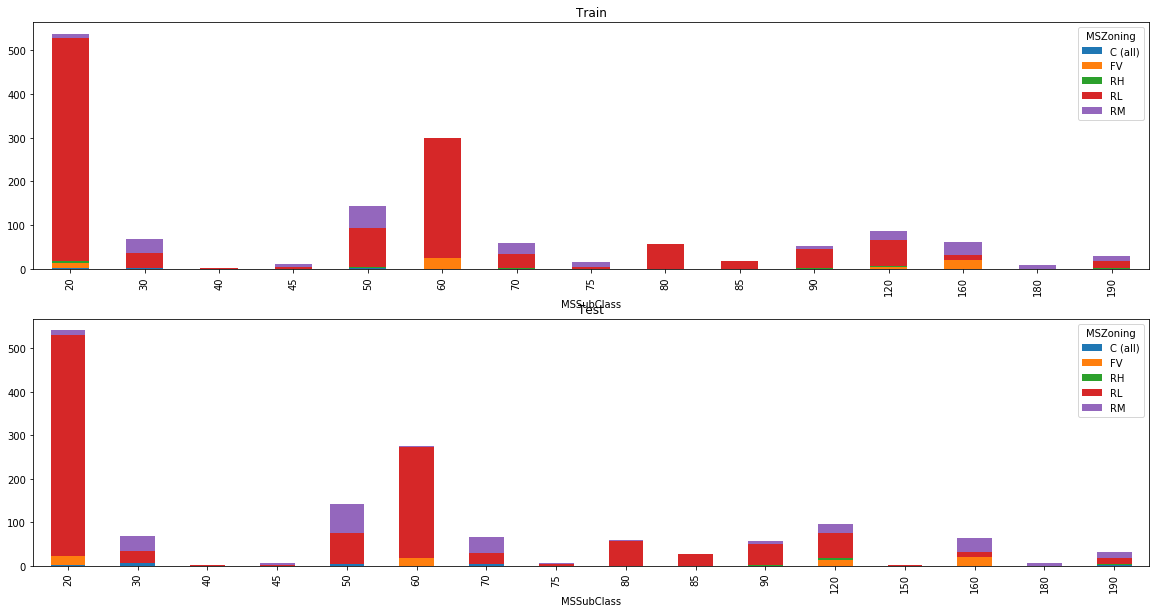

In [599]:
train_fill = pd.read_csv('train.csv')
test_fill = pd.read_csv('test.csv')
fig, axes = plt.subplots(2,1)
train_fill[['MSSubClass', 'MSZoning']].groupby(['MSSubClass', 'MSZoning']).size().unstack().plot(kind  = 'bar', figsize = (20, 10), stacked = True, ax = axes[0], title = 'Train')
test_fill[['MSSubClass', 'MSZoning']].groupby(['MSSubClass', 'MSZoning']).size().unstack().plot(kind  = 'bar', figsize = (20, 10), stacked = True, ax = axes[1], title = 'Test')

In [600]:
test['MSZoning'] = test['MSZoning'].fillna('RL')
test['MSZoning'].isnull().sum()

0

### 2-2. Mapping

In [601]:
mszoning_mapping = mapping('MSZoning')
for data in train_test_data:
    data['MSZoning'].replace(mszoning_mapping, inplace = True)

In [602]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,5,3,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,0,3,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,5,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,6,3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,5,3,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [603]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0,2,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,0,3,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,5,3,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,5,3,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,11,3,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 3. LotFrontage
Linear feet of street connected to property

In [604]:
train_test_info('LotFrontage')

Information of LotFrontage 

Train
Number of null :  259
Number of value unique :  111
Kind of value unique :  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


Test
Number of null :  227
Number of value unique :  116
Kind of value unique :  [ 80.  81.  74.  78.  43.  75.  nan  63.  85.  70.  26.  21.  24. 102.
  94.  90.  79. 110. 105.  41. 100.  67.  60.  73.  92.  84.  39.  88.
  25.  30.  57.  68.  98. 120.  87. 119.  65.  56.  69.  50.  53.  52.
  51.  72.  86. 124.  44.  83

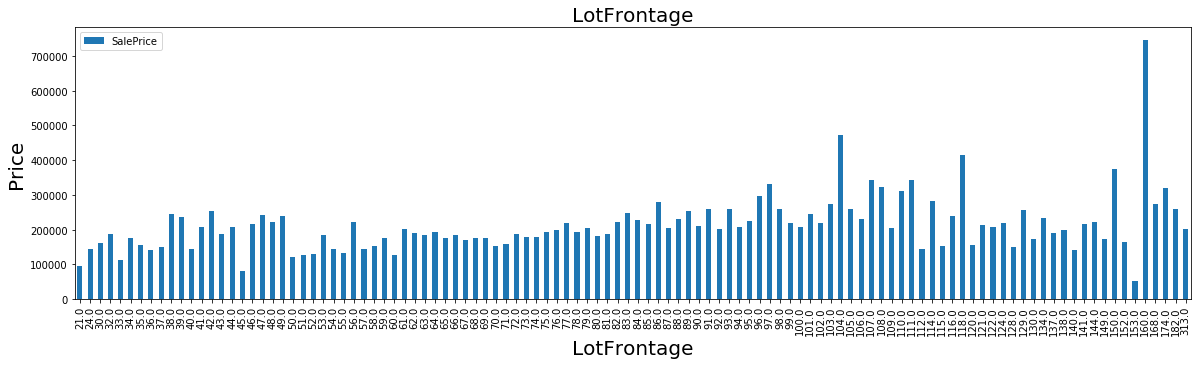

In [605]:
chart_bar('LotFrontage')

### 3-1. Fill Nan

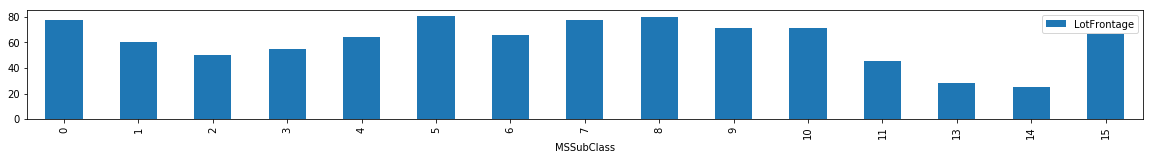

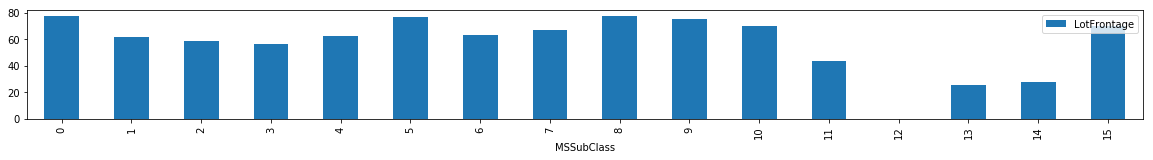

In [606]:
train[['MSSubClass', 'LotFrontage']].groupby('MSSubClass').mean().plot(kind = 'bar', figsize = (20, 2))
test[['MSSubClass', 'LotFrontage']].groupby('MSSubClass').mean().plot(kind = 'bar', figsize = (20, 2))

In [607]:
for data in train_test_data:
    df = data[['MSSubClass', 'LotFrontage']].groupby('MSSubClass')['LotFrontage'].mean()
    for index, value in zip(df.index, df.values):
        data.loc[data['MSSubClass'] == index, 'LotFrontage'] = data.loc[data['MSSubClass'] == index, 'LotFrontage'].fillna(value)

In [608]:
print(train['LotFrontage'].isnull().sum())
print(test['LotFrontage'].isnull().sum())

0
1


In [609]:
test.loc[test['LotFrontage'].isnull(), 'LotFrontage'] = test['LotFrontage'].mean()

In [610]:
print(train['LotFrontage'].isnull().sum())
print(test['LotFrontage'].isnull().sum())

0
0


## 4. LotArea
Lot size in square feet

In [611]:
train_test_info('LotArea')

Information of LotArea 

Train
Number of null :  0
Number of value unique :  1073
Kind of value unique :  [ 8450  9600 11250 ... 17217 13175  9717]


Test
Number of null :  0
Number of value unique :  1106
Kind of value unique :  [11622 14267 13830 ...  1894 20000 10441]




In [612]:
train['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

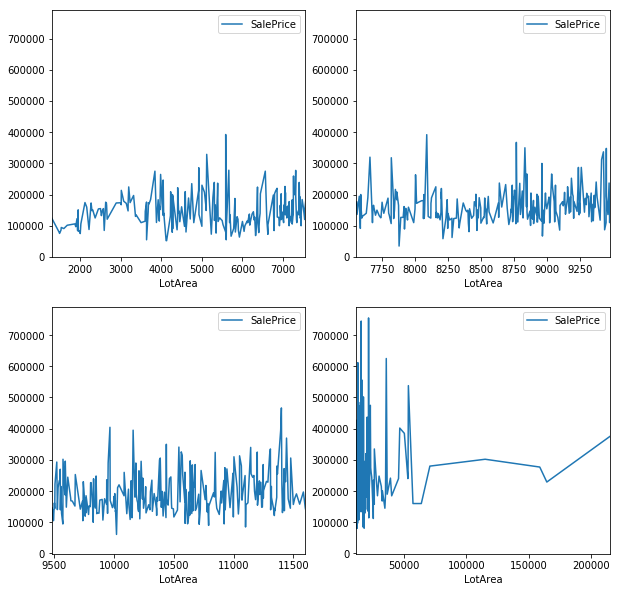

In [613]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
train[['LotArea', 'SalePrice']].groupby('LotArea').mean().plot(xlim = (1300, 7553.5), ax = axes[0,0])
train[['LotArea', 'SalePrice']].groupby('LotArea').mean().plot(xlim = (7553.5, 9478.5), ax = axes[0,1])
train[['LotArea', 'SalePrice']].groupby('LotArea').mean().plot(xlim = (9478.5, 11601.5), ax = axes[1,0])
train[['LotArea', 'SalePrice']].groupby('LotArea').mean().plot(xlim = (11601.5, 215245), ax = axes[1,1])

In [614]:
train_lot = pd.read_csv('train.csv')

In [615]:
train_lot.loc[train_lot['LotArea'] < 7553.5, 'LotArea'] = 0
train_lot.loc[(train_lot['LotArea'] >= 7553.5) & (train_lot['LotArea'] < 9478.5), 'LotArea'] = 1
train_lot.loc[(train_lot['LotArea'] >= 9478.5) & (train_lot['LotArea'] < 11601.5), 'LotArea'] = 2
train_lot.loc[(train_lot['LotArea'] >= 11601.5), 'LotArea'] = 3

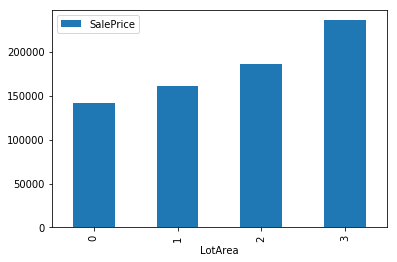

In [616]:
train_lot[['LotArea', 'SalePrice']].groupby('LotArea').mean().plot(kind = 'bar')

## 5. Street
Type of road access to property

In [617]:
train_test_info('Street')

Information of Street 

Train
Number of null :  0
Number of value unique :  2
Kind of value unique :  ['Pave' 'Grvl']


Test
Number of null :  0
Number of value unique :  2
Kind of value unique :  ['Pave' 'Grvl']




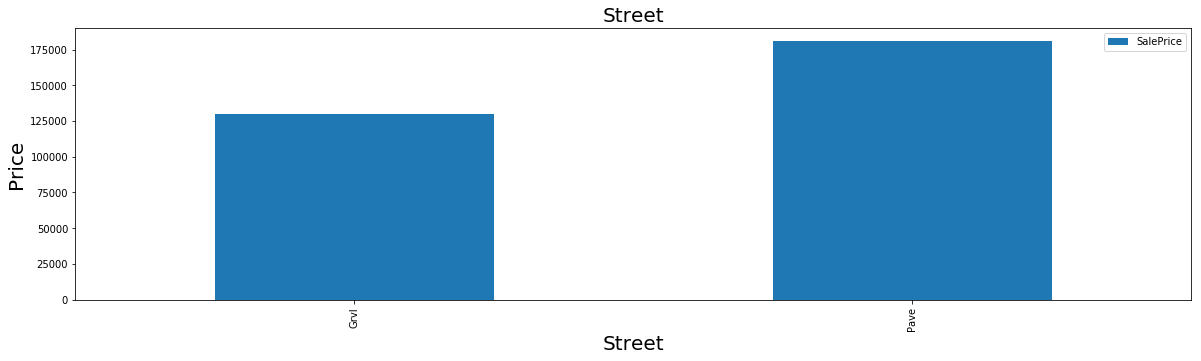

In [618]:
chart_bar('Street')

In [619]:
for data in train_test_data:
    data.loc[data['Street'] == 'Grvl', 'Street'] = 0
    data.loc[data['Street'] == 'Pave', 'Street'] = 1

## 6. Alley
Type of alley access to property

In [620]:
train_test_info('Alley')

Information of Alley 

Train
Number of null :  1369
Number of value unique :  3
Kind of value unique :  [nan 'Grvl' 'Pave']


Test
Number of null :  1352
Number of value unique :  3
Kind of value unique :  [nan 'Pave' 'Grvl']




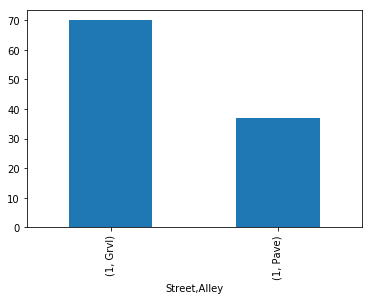

In [621]:
test[['Street', 'Alley']].groupby(['Street', 'Alley']).size().plot(kind = 'bar')

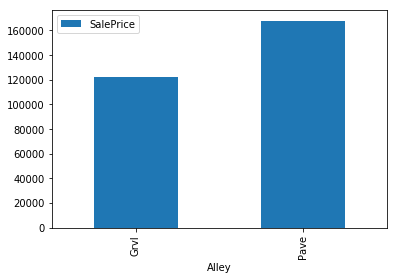

In [622]:
train[['Alley', 'SalePrice']].groupby('Alley').mean().plot(kind = 'bar')

In [623]:
for data in train_test_data:
    data.loc[data['Alley'] == 'Grvl', 'Alley'] = 0
    data.loc[data['Alley'] == 'Pave', 'Alley'] = 1
    data['Alley'] = data['Alley'].fillna(3)

In [624]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0,2,80.0,11622,1,3,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,0,3,81.0,14267,1,3,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,5,3,74.0,13830,1,3,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,5,3,78.0,9978,1,3,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,11,3,43.0,5005,1,3,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 7. LotShape
General shape of property

    Reg	Regular	
    IR1	Slightly irregular
    IR2	Moderately Irregular
    IR3	Irregular 

In [625]:
train_test_info('LotShape')

Information of LotShape 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['Reg' 'IR1' 'IR2' 'IR3']


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['Reg' 'IR1' 'IR2' 'IR3']




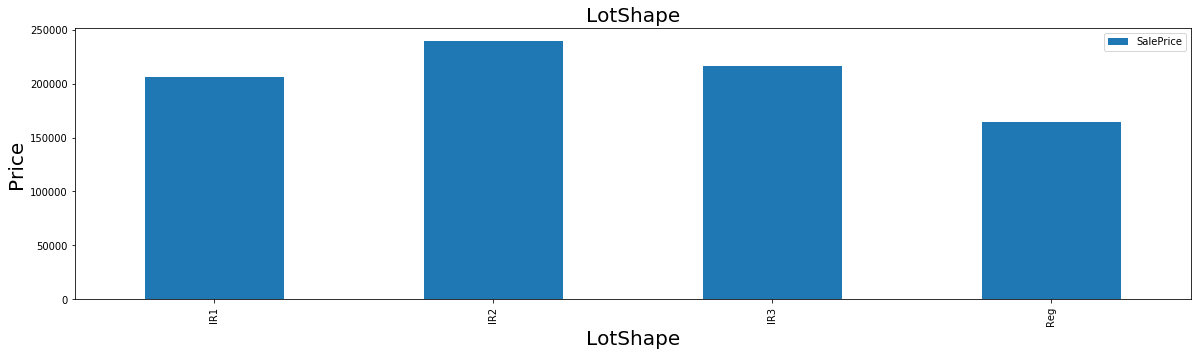

In [626]:
chart_bar('LotShape')

In [632]:
mapping('LotShape')

{'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}

In [635]:
for data in train_test_data:
    data['LotShape'] = data['LotShape'].map(mapping('LotShape'))

In [639]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,0,2,80.0,11622,1,3,3,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,0,3,81.0,14267,1,3,0,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,5,3,74.0,13830,1,3,0,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,5,3,78.0,9978,1,3,0,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,11,3,43.0,5005,1,3,0,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 8. LandContour
Flatness of the property

    Lvl	Near Flat/Level	
    Bnk	Banked - Quick and significant rise from street grade to building
    HLS	Hillside - Significant slope from side to side
    Low	Depression

In [640]:
train_test_info('LandContour')

Information of LandContour 

Train
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['Lvl' 'Bnk' 'Low' 'HLS']


Test
Number of null :  0
Number of value unique :  4
Kind of value unique :  ['Lvl' 'HLS' 'Bnk' 'Low']




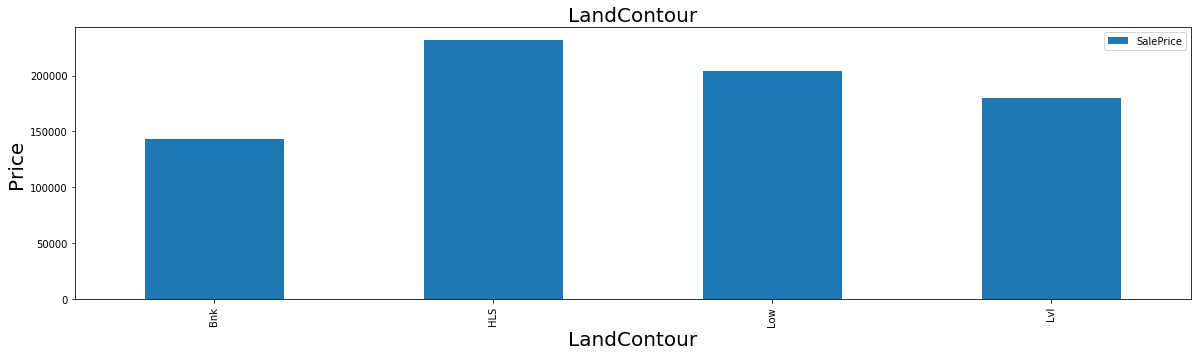

In [641]:
chart_bar('LandContour')

In [642]:
for data in train_test_data:
    data['LandContour'] = data['LandContour'].map(mapping('LandContour'))

### 9. Utilities
Type of utilities available

    AllPub	All public Utilities (E,G,W,& S)	
    NoSewr	Electricity, Gas, and Water (Septic Tank)
    NoSeWa	Electricity and Gas Only
    ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope 

In [644]:
train_test_info('Utilities')

Information of Utilities 

Train
Number of null :  0
Number of value unique :  2
Kind of value unique :  ['AllPub' 'NoSeWa']


Test
Number of null :  2
Number of value unique :  2
Kind of value unique :  ['AllPub' nan]




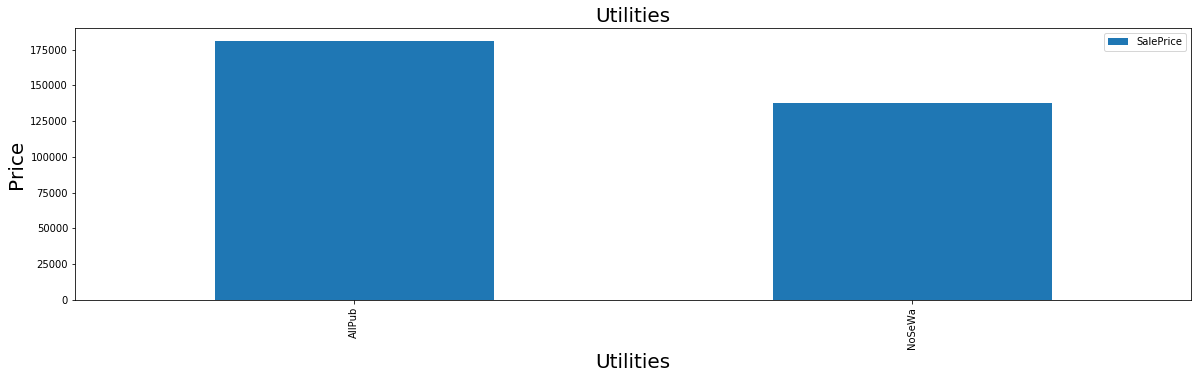

In [645]:
chart_bar('Utilities')

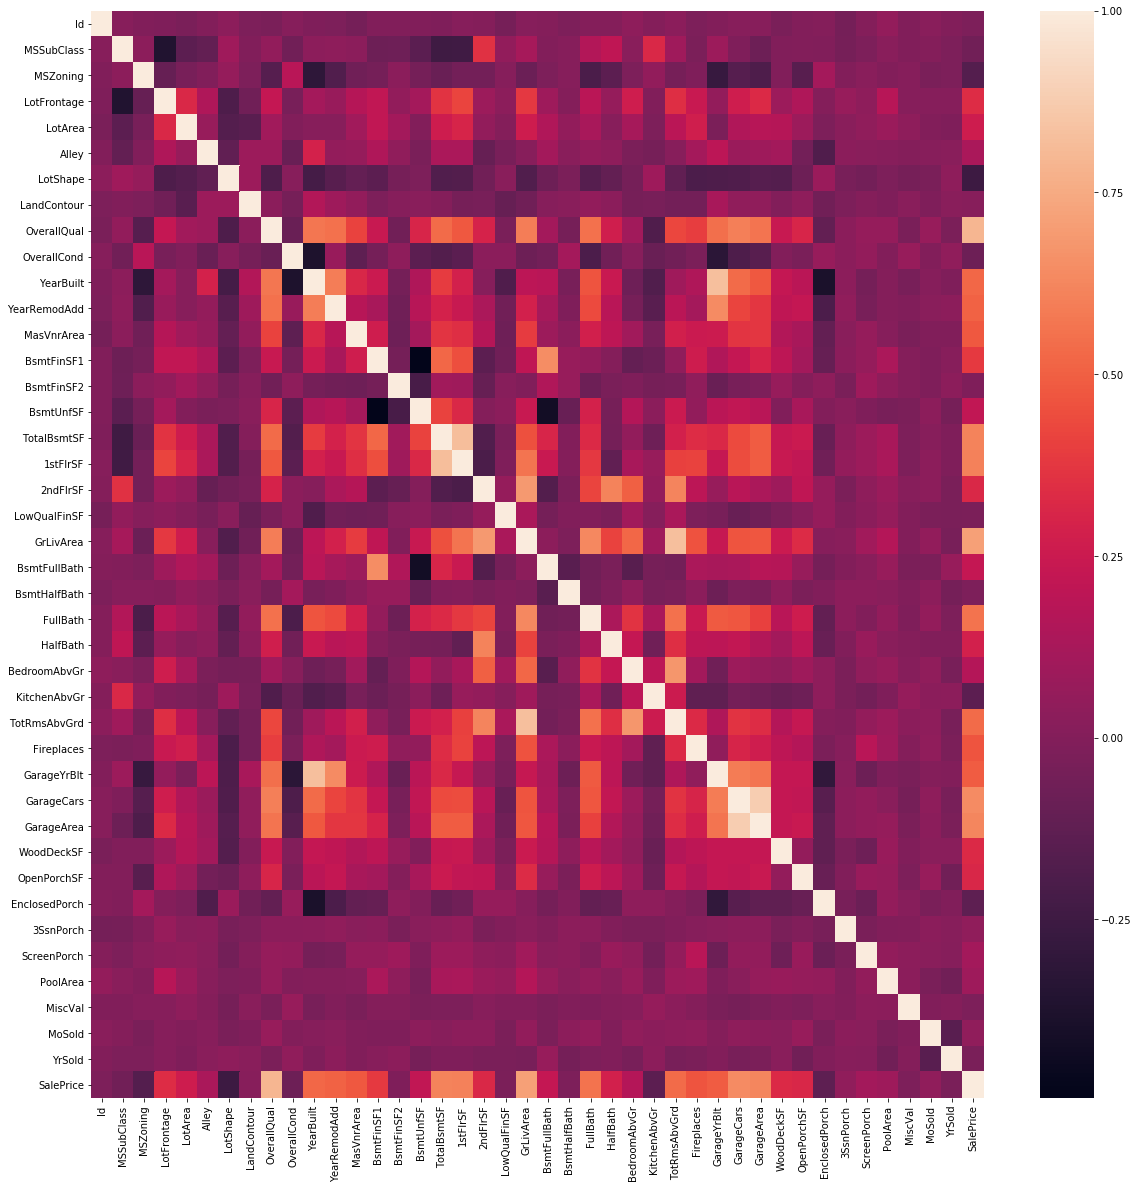

In [670]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(train.corr())

In [684]:
df = train.corr()
df[(df > 0.5) & (df < 0.99)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSZoning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## References
- Feature description for Korean : https://blog.naver.com/kyungmin3737/221042939756